# K-Means Clustering

**Beginner-friendly, step-by-step notebook** using the Iris dataset from `sklearn.datasets`.

**Contents:**
- Introduction (theory)
- Load Iris dataset
- Exploratory Data Analysis (EDA)
- Prepare data for K-Means
- Elbow Method to choose K
- Apply K-Means and visualize clusters
- Class Task (with solution)
- Student Tasks (without solutions)

Each code cell is followed by a short Markdown explanation.

## 1 — Quick Theory (in simple words)

- **Clustering** groups similar items together without using labels (unsupervised learning).
- **K-Means** partitions data into **K** clusters by:
  1. Choosing K initial centroids (randomly or by algorithm).
  2. Assigning each point to the nearest centroid.
  3. Updating centroids as the mean of assigned points.
  4. Repeating assignment & update until convergence.

**Important notes:**
- You must pick **K**. The **Elbow Method** helps pick a reasonable K.
- K-Means works best with numerical features and when clusters are roughly spherical.


In [ ]:
# Imports and loading the Iris dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Explanation:**

- We import required libraries: `numpy`, `pandas`, `matplotlib`, `sklearn` modules.
- We load the Iris dataset using `load_iris()` and create a `DataFrame` for easy inspection.
- The DataFrame `df` contains 4 numeric features: sepal length, sepal width, petal length, petal width.

In [ ]:
# Basic info and statistics
print('Shape:', df.shape)
print('\nColumns:', list(df.columns))

df.describe()

Shape: (150, 4)

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Explanation:**

- We printed the shape and column names to confirm the dataset size and features.
- `df.describe()` shows summary statistics (mean, std, min, max) for each numeric feature.

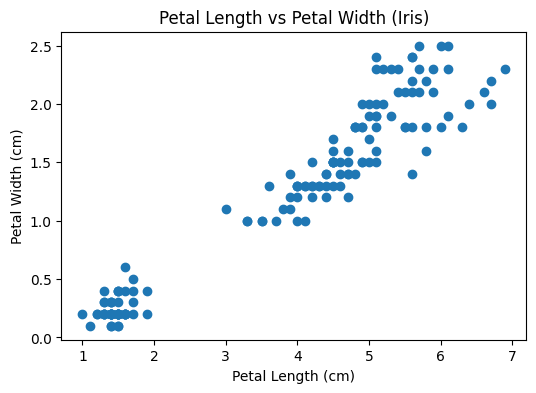

In [ ]:
# Scatter plot: petal length vs petal width
plt.figure(figsize=(6,4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width (Iris)')
plt.show()

**Explanation:**

- We plot petal length vs petal width. These two features often separate species well and are useful for clustering.
- Each point is one flower sample; visually you may already see some grouping.

In [ ]:
# Standardize features before K-Means (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Put scaled features into a DataFrame for convenience
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**Explanation:**

- K-Means uses distances; features with larger scales dominate unless we standardize.
- We use `StandardScaler` to transform features to mean 0 and variance 1.
- `df_scaled` holds the standardized values.

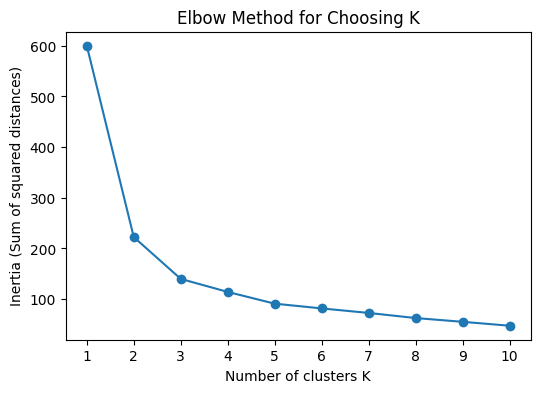

In [ ]:
# Elbow Method: compute inertia (sum of squared distances) for different K
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(list(K_range), inertia, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Choosing K')
plt.xticks(list(K_range))
plt.show()

**Explanation:**

- We run K-Means for K from 1 to 10 and record `inertia` (lower is better).
- The plot shows inertia vs K. Look for the 'elbow' point where improvements slow down.
- That elbow is a good candidate for K. For Iris, commonly K=3 is a reasonable choice.

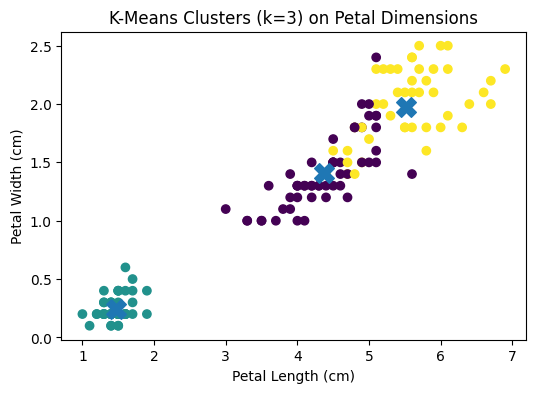

In [ ]:
# Apply K-Means with K=3 (common for Iris)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# Visualize clusters on petal length vs petal width
plt.figure(figsize=(6,4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=clusters)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clusters (k=3) on Petal Dimensions')
# Mark centroids (transform centroids back to original scale for plotting)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,2], centroids[:,3], marker='X', s=200)
plt.show()

**Explanation:**

- We set `k=3`, fit K-Means, and get cluster labels for each sample.
- The scatter plot uses petal length and petal width to show cluster membership.
- Centroids are plotted as large X markers (we inverse-transformed centroids to original scale for easier interpretation).

In [ ]:
# Compare predicted clusters with actual species (for analysis only)
true_labels = iris.target

comparison = pd.crosstab(true_labels, df['Cluster'], rownames=['True Species'], colnames=['Predicted Cluster'])
comparison

Predicted Cluster,0,1,2
True Species,,,
0,0,50,0
1,39,0,11
2,14,0,36


**Explanation:**

- We compare the cluster assignments to the true species labels (only for analysis — clustering is unsupervised so it does not use labels during fitting).
- `pd.crosstab` helps understand how clusters map to real species.

## Class Task (with solution)

**Task:**
- Use only `sepal length (cm)` and `sepal width (cm)` from the Iris dataset.
- Standardize these two features, apply K-Means with `k=2` and visualize the clusters.

Below is the solution code. Run it to see how K-Means groups the data on sepal dimensions.

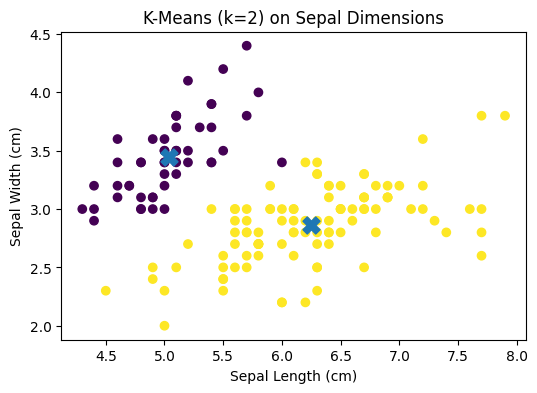

,count
0,50
1,100


In [ ]:
# Class Task Solution: K-Means on sepal length & sepal width
features = ['sepal length (cm)', 'sepal width (cm)']
X_sepal = df[features].values
X_sepal_scaled = scaler.fit_transform(X_sepal)

k2 = 2
km2 = KMeans(n_clusters=k2, random_state=42, n_init=10)
labels_sepal = km2.fit_predict(X_sepal_scaled)

plt.figure(figsize=(6,4))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=labels_sepal)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means (k=2) on Sepal Dimensions')
centroids2 = scaler.inverse_transform(km2.cluster_centers_)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='X', s=150)
plt.show()

# Show counts per cluster
pd.Series(labels_sepal).value_counts().sort_index()

**Explanation (solution):**

- We selected sepal features and standardized them.
- K-Means with k=2 partitions the sepal-dimension space into two groups.
- The scatter plot shows how samples are divided; centroids are marked with X.
- `.value_counts()` shows how many samples belong to each cluster.

## Student Tasks (without solutions)

Try these on your own **inside the notebook** (as separate cells):

**Task 1:** Use all four features and try `k=2,3,4`. For each K, fit K-Means and report the inertia. Which K looks best based on inertia?

**Task 2:** Run K-Means with `k=3` but use only `petal length` and `sepal width` as features. Visualize the clusters and interpret whether clusters separate well.

**Task 3:** Use `StandardScaler` and also try `MinMaxScaler` on the same features. Compare the resulting clusters (do labels change?).

**Task 4:** For K from 2 to 6, compute Silhouette Score (from `sklearn.metrics`) and report which K gives the best silhouette score.

**Task 5:** Create a small custom dataset (6–8 points) with two numeric features where you think there are exactly 2 clusters. Run K-Means with `k=2` and plot the results. Explain why the clustering result matches your expectation.

---
Good practice: Try to write your code, run it, and add short Markdown notes explaining your findings.

---
## Final Notes & Tips

- Always **standardize** features for K-Means unless features are already comparable.
- Use the **Elbow Method** and **Silhouette Score** to choose K — they are just guides, not strict rules.
- K-Means assumes clusters are convex and isotropic; it may not work well for complex shapes.
- For reproducibility, set `random_state`.

**Now the notebook file is ready.** Download it and open it in Jupyter or VS Code to run the cells interactively.